In [1]:
from models.detector_model.my_yolo import YOLO, YOLOTrainingProcessor, COCODataProcessor

grouped_classes = {
        "Metal": [
            "Metal bottle cap", "Metal lid", "Drink can", "Pop tab", "Scrap metal",
            "Food Can", "Aluminium blister pack", "Aluminium foil", "Aerosol"
        ],
        "Plastic": [
            "Plastic bottle cap", "Other plastic wrapper", "Six pack rings",
            "Single-use carrier bag", "Plastic straw", "Plastic glooves",
            "Plastic utensils", "Disposable plastic cup", "Other plastic bottle",
            "Tupperware", "Spread tub", "Garbage bag", "Other plastic container",
            "Other plastic", "Rope & strings", "Other plastic cup", "Plastic film",
            "Polypropylene bag", "Plastic lid", "Clear plastic bottle", "Squeezable tube",
            "Carded blister pack", "Crisp packet", "Meal carton"
        ],
        "Paper": [
            "Paper cup", "Paper bag", "Normal paper", "Paper straw", "Tissues",
            "Toilet tube", "Wrapping paper", "Pizza box", "Magazine paper",
            "Corrugated carton", "Egg carton", "Other carton", "Drink carton"
        ],
        "Glass": [
            "Glass jar", "Glass bottle", "Glass cup", "Broken glass"
        ],
        "Waste": [
            "Cigarette", "Food waste", "Foam cup",
            "Disposable food container", "Foam food container",
            "Shoe", "Unlabeled litter", "Styrofoam piece"
        ],
        "Battery": [
            "Battery"
        ],
    }

In [2]:
model = YOLO(num_classes=len(grouped_classes), num_anchors=2, grid_size=7)
coco_processor = COCODataProcessor(classes=grouped_classes)

In [3]:
extracted_trash = coco_processor.extract_annotations(
    'D:/Sakal/AI_FARM/Recycling_Classification/Dataset/Dataset/Trash Detection.v14i.coco/train/_annotations.coco.json',
    'D:/Sakal/AI_FARM/Recycling_Classification/Dataset/Dataset/Trash Detection.v14i.coco/train',
    convert=False
)

extracted_taco = coco_processor.extract_annotations(
    'D:/Sakal/AI_FARM/Recycling_Classification/Dataset/TACO/data/annotations.json',
    'D:/Sakal/AI_FARM/Recycling_Classification/Dataset/TACO/data',
    convert=True
)

classes_names_trash = []
for label in extracted_trash:
    classes_names_trash.extend(label['Class'])
classes_names_trash = list(set(classes_names_trash))

classes_names_taco = []
for label in extracted_taco:
    classes_names_taco.extend(label['Class'])
classes_names_taco = list(set(classes_names_taco))

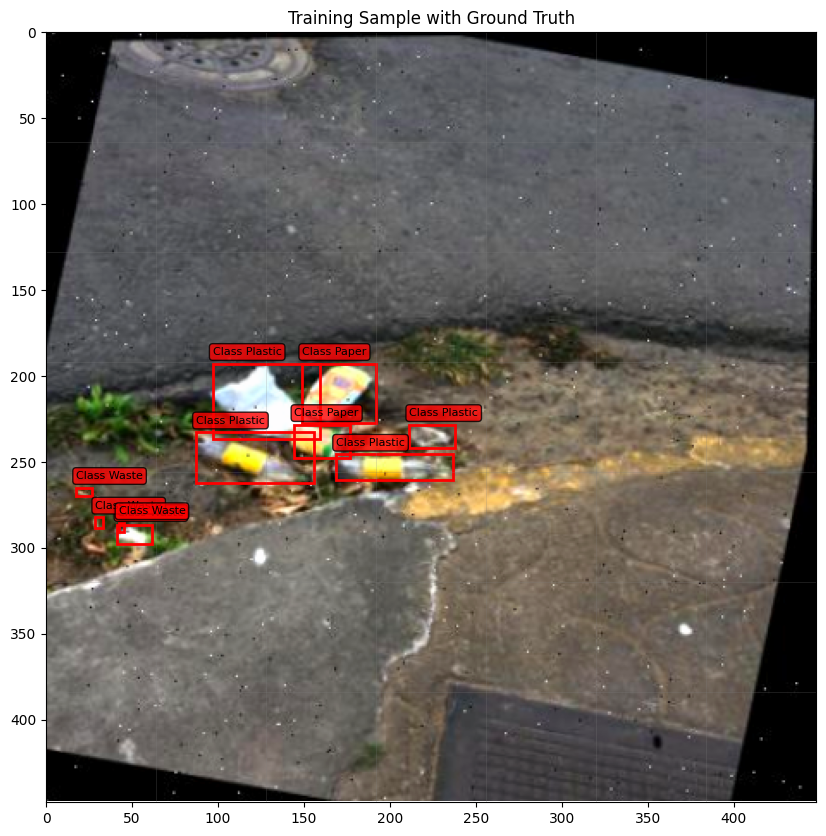

In [4]:
classes = [item for item, value in grouped_classes.items()] # ['Metal', 'Plastic', 'Paper', 'Glass', 'Waste', 'Battery']

processor = YOLOTrainingProcessor(
    input_size=448,
    grid_size=7,
    classes=classes,
    num_anchors=10
)

image_tensor, target_tensor, anchor_pose = processor.process_training_sample(
    extracted_trash[90], apply_augmentation=True, get_anchors=True)

processor.visualize_training_sample(
    image_tensor, target_tensor, anchor_pose,)